# This is Nir Levy and Shahar Michel Project, about predicting the NBA Draft picks. In this section, we did all the EDA to check if there any correlation between indices

In [1]:
import numpy as np
import json
import os
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#We loaded the csv file that we created in the dataset handeling, to work with it here.
Draft_Picks_df = pd.read_csv("All_Draft_Picks_Update.csv")
Draft_Picks_df = Draft_Picks_df.drop("Unnamed: 0",axis = 1)
Draft_Picks_df = Draft_Picks_df.reset_index()
Draft_Picks_df = Draft_Picks_df.drop("index",axis = 1)

Text(0, 0.5, 'Drafted or not')

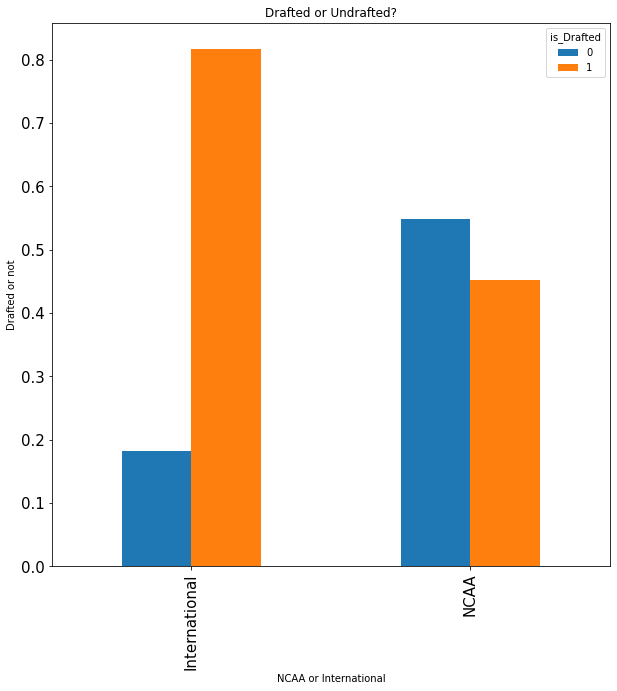

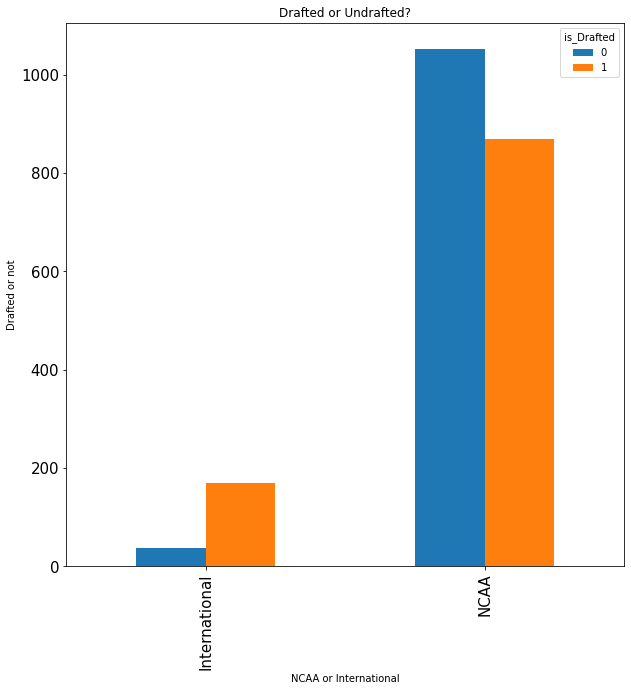

In [3]:
#In this graph, we check if there any connection between the league that players came from and if they got drafted or not
Drafted_Or_Undrafted = pd.crosstab(Draft_Picks_df['NIG'],Draft_Picks_df['is_Drafted'], normalize = 'index')
Drafted_Or_Undrafted.plot(kind = 'bar', figsize=(10,10), fontsize=15)
plt.title('Drafted or Undrafted?')
plt.xlabel('NCAA or International')
plt.ylabel('Drafted or not')
Drafted_Or_Undrafted = pd.crosstab(Draft_Picks_df['NIG'],Draft_Picks_df['is_Drafted'])
Drafted_Or_Undrafted.plot(kind = 'bar', figsize=(10,10), fontsize=15)
plt.title('Drafted or Undrafted?')
plt.xlabel('NCAA or International')
plt.ylabel('Drafted or not')

### As we can see from the 2 graphs above, high percentage of the players that did not play in the NCAA are getting picked in the draft, but there are a much more players that comes from the NCAA.

Text(0, 0.5, 'How many?')

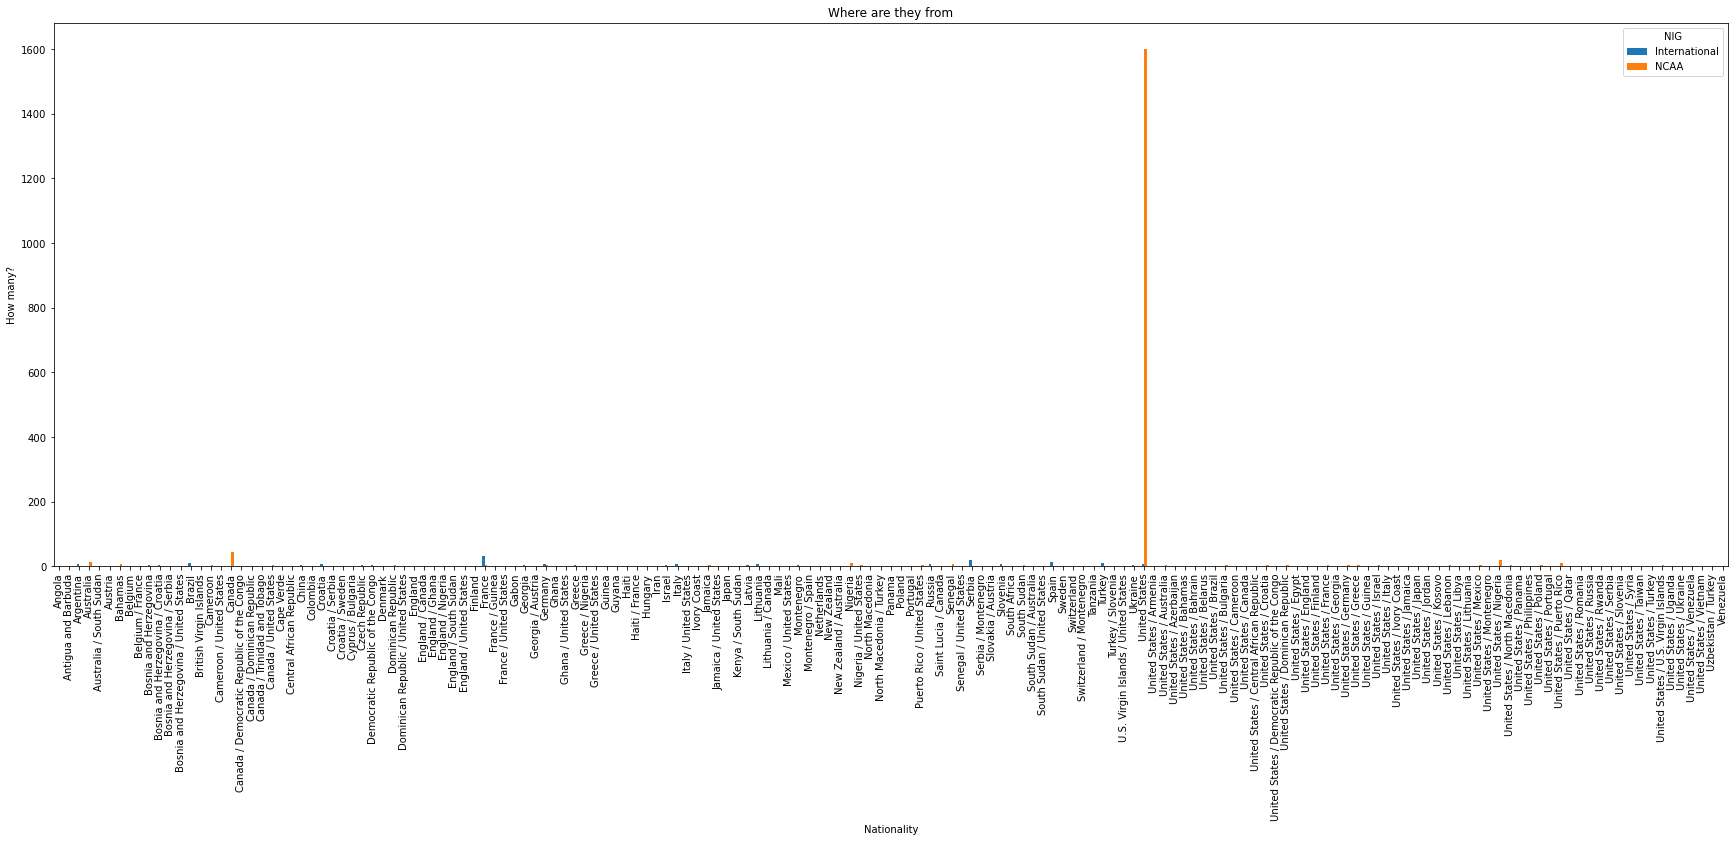

In [4]:
#In this graph, we check if there any connection between the league that players came from and if their nationality.
Drafted_Or_Undrafted = pd.crosstab(Draft_Picks_df['Nationality'],Draft_Picks_df['NIG'])
Drafted_Or_Undrafted.plot(kind = 'bar', figsize=(30,10))
plt.title('Where are they from')
plt.xlabel('Nationality')
plt.ylabel('How many?')

array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

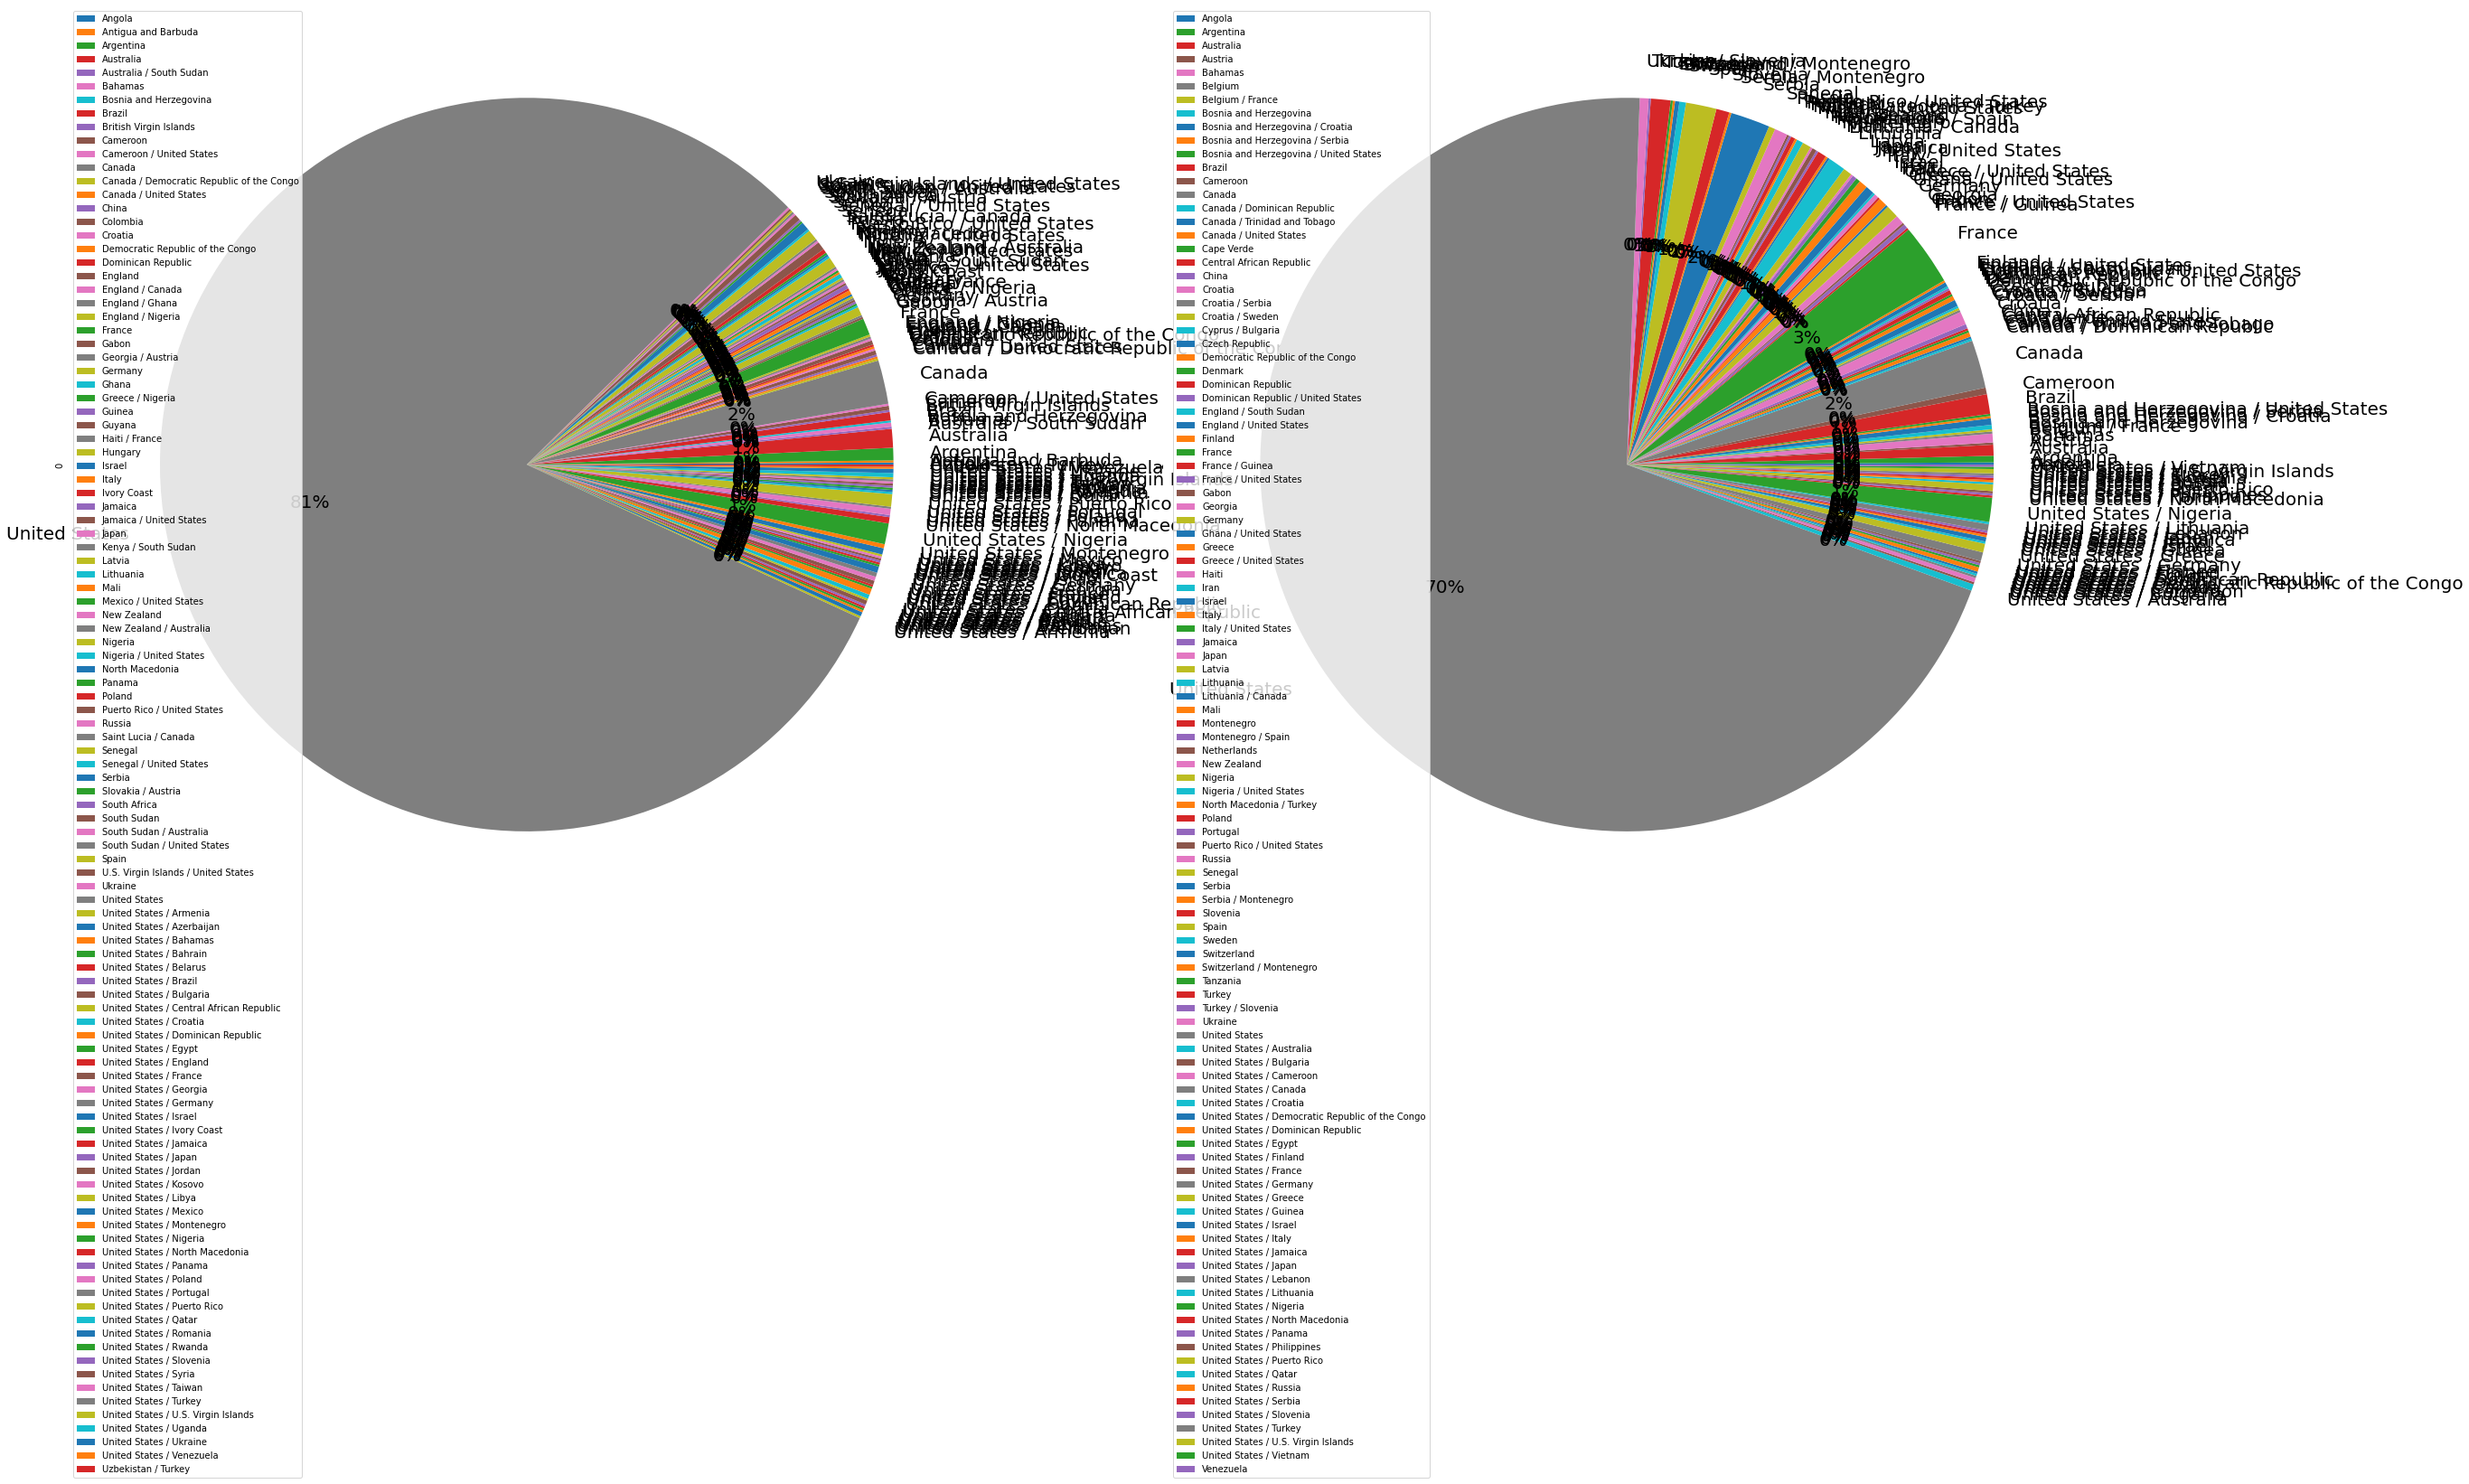

In [5]:
#In this pie chart, we can see that most of the players are coming from the USA
Drafted_Or_Undrafted = pd.crosstab(Draft_Picks_df['Nationality'],Draft_Picks_df['is_Drafted'])
Drafted_Or_Undrafted.plot(kind = 'pie',subplots = True,figsize=(40,50), autopct='%1.0f%%', fontsize = 20)

Text(0, 0.5, 'Team')

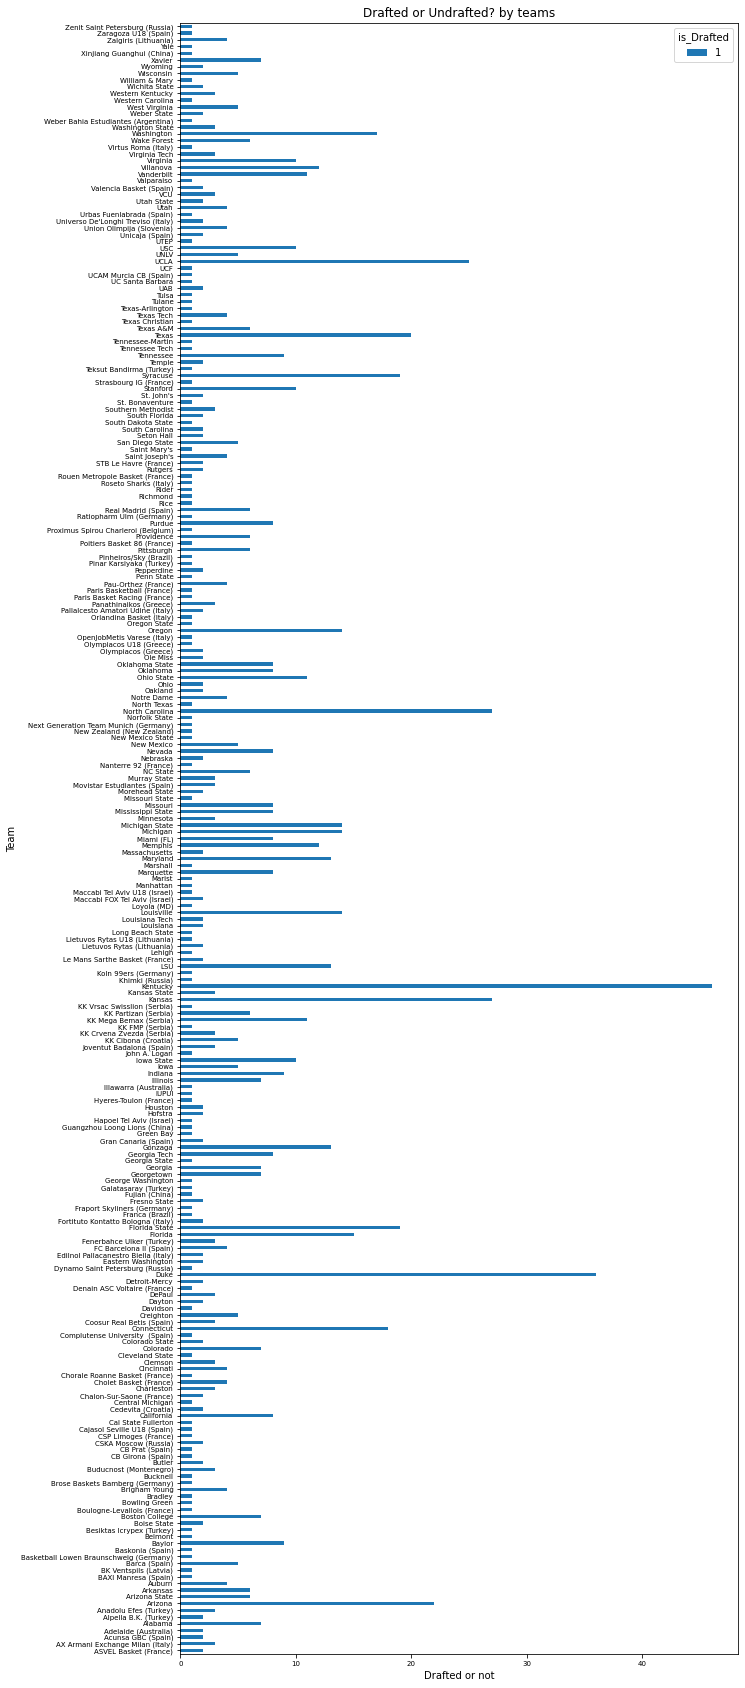

In [6]:
#In this graph, we checked only the players that drafted, and we wanted to see from which team each of them came from.
new_df = Draft_Picks_df.loc[~(Draft_Picks_df['is_Drafted'] == 0)]
Drafted_Or_Undrafted = pd.crosstab(new_df['Team'],new_df['is_Drafted'])
Drafted_Or_Undrafted.plot(kind = 'barh', figsize=(10,30), fontsize = 7)
plt.title('Drafted or Undrafted? by teams')
plt.xlabel('Drafted or not')
plt.ylabel('Team')

Text(0, 0.5, 'Drafted or not')

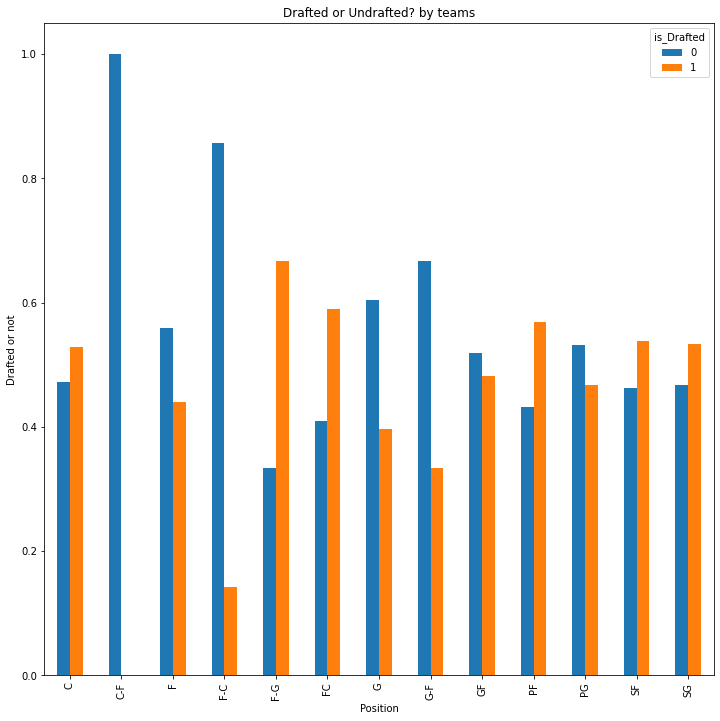

In [7]:
#In this graph, we check if there any connection between the players' Position and if they got drafted or not
Drafted_Or_Undrafted = pd.crosstab(Draft_Picks_df['Position'],Draft_Picks_df['is_Drafted'], normalize = 'index')
Drafted_Or_Undrafted.plot(kind = 'bar',stacked = False, figsize=(12,12))
plt.title('Drafted or Undrafted? by teams')
plt.xlabel('Position')
plt.ylabel('Drafted or not')

Text(0.5, 0, 'BMI')

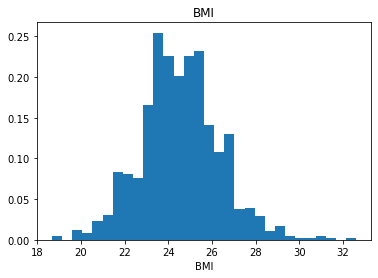

In [8]:
# In this histogram, we checked the BMI for the players who got drafted
plt.hist(new_df['BMI'],density = True, bins = 30)
plt.title('BMI')
plt.xlabel('BMI')

Text(0.5, 0, 'BMI')

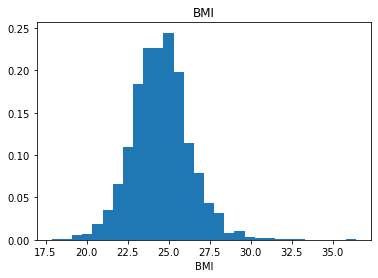

In [9]:
# In this histogram, we checked the BMI for the all the players
plt.hist(Draft_Picks_df['BMI'],density = True, bins = 30)
plt.title('BMI')
plt.xlabel('BMI')

In [10]:
cor_isdrafted_Team = pd.crosstab(Draft_Picks_df['is_Drafted'],Draft_Picks_df['Team'])
from scipy.stats import chi2_contingency
chi2_contingency(cor_isdrafted_Team)
cor_isdrafted_Nationality = pd.crosstab(Draft_Picks_df['Nationality'],Draft_Picks_df['is_Drafted'])
chi2_contingency(cor_isdrafted_Nationality)
cor_isdrafted_position = pd.crosstab(Draft_Picks_df['Position'],Draft_Picks_df['is_Drafted'])
chi2_contingency(cor_isdrafted_position)

(38.27217402787798,
 0.00013859152417233992,
 12,
 array([[127.02723005, 120.97276995],
        [  0.51220657,   0.48779343],
        [167.4915493 , 159.5084507 ],
        [  3.58544601,   3.41455399],
        [  1.53661972,   1.46338028],
        [ 42.51314554,  40.48685446],
        [214.61455399, 204.38544601],
        [  1.53661972,   1.46338028],
        [ 54.29389671,  51.70610329],
        [131.6370892 , 125.3629108 ],
        [103.97793427,  99.02206573],
        [116.27089202, 110.72910798],
        [126.0028169 , 119.9971831 ]]))

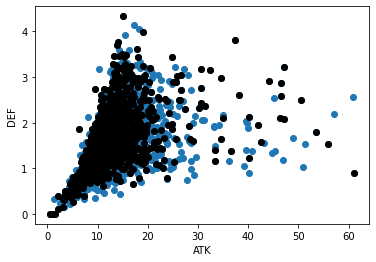

In [11]:
# Here we checked the connection between ATK parameters and DEF parameters
fig = plt.figure()
ax = plt.axes()
ax.scatter(Draft_Picks_df.ATK, Draft_Picks_df.DEF)
plt.xlabel('ATK')
plt.ylabel('DEF')
ax.scatter(Draft_Picks_df.ATK[Draft_Picks_df.is_Drafted==1], Draft_Picks_df.DEF[Draft_Picks_df.is_Drafted==1], c = 'black')
plt.show()

Text(0, 0.5, 'Drafted or not')

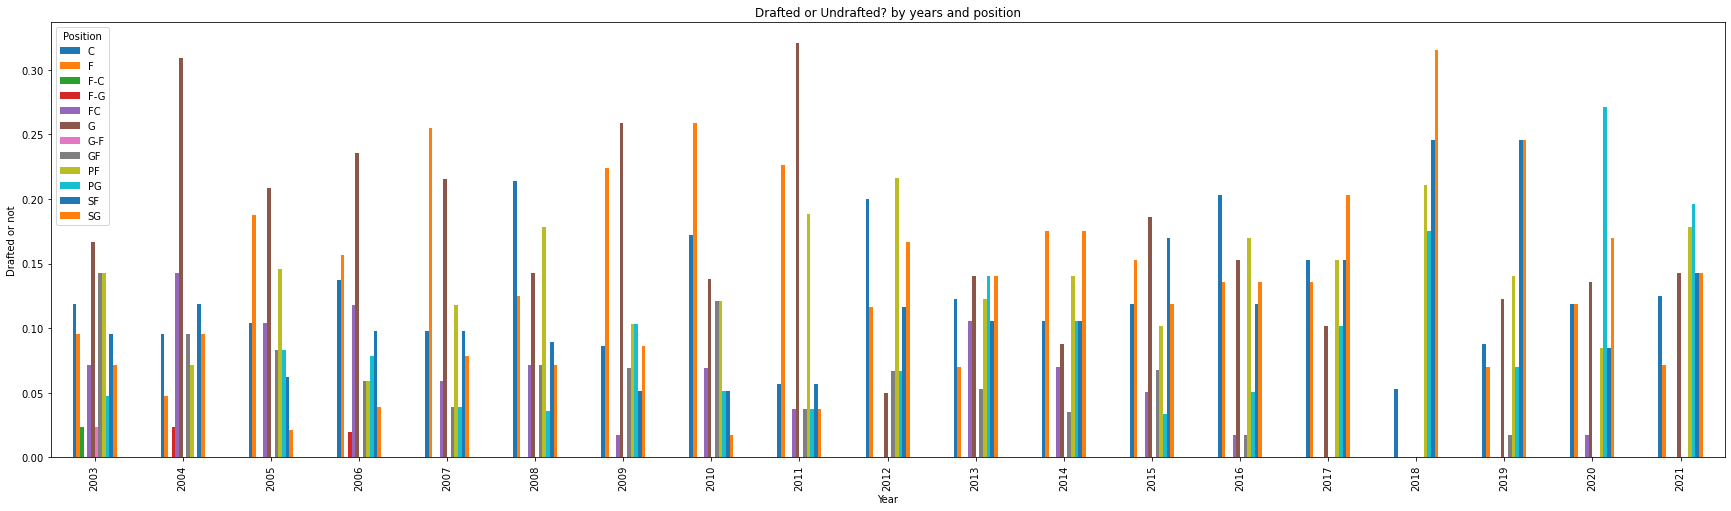

In [12]:
# Here we checked the most needable position each year
Years_and_pos = pd.crosstab(Draft_Picks_df["Selection Year"][Draft_Picks_df.is_Drafted==1],Draft_Picks_df.Position[Draft_Picks_df.is_Drafted==1], normalize = 'index')
Years_and_pos.plot(kind = 'bar',stacked = False, figsize=(30,8))
plt.title('Drafted or Undrafted? by years and position')
plt.xlabel('Year')
plt.ylabel('Drafted or not')

Text(0.5, 0, 'Position')

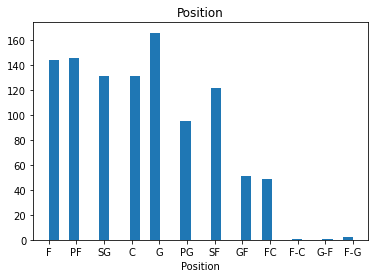

In [13]:
plt.hist(new_df['Position'], bins = 30)
plt.title('Position')
plt.xlabel('Position')

Text(0.5, 0, 'Position')

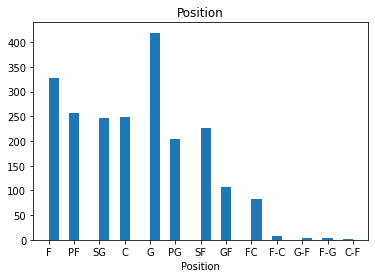

In [14]:
plt.hist(Draft_Picks_df['Position'], bins = 30)
plt.title('Position')
plt.xlabel('Position')

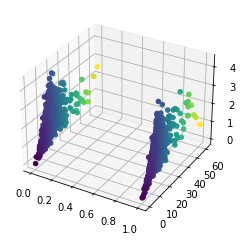

In [15]:
ax = plt.axes(projection = "3d")
xdata = Draft_Picks_df.is_Drafted == 1
ydata = Draft_Picks_df.ATK
zdata = Draft_Picks_df.DEF
plt.xlabel = ("position")
plt.ylabel = ("Year")
ax.scatter3D(xdata,ydata,zdata,c = ydata,depthshade = False)

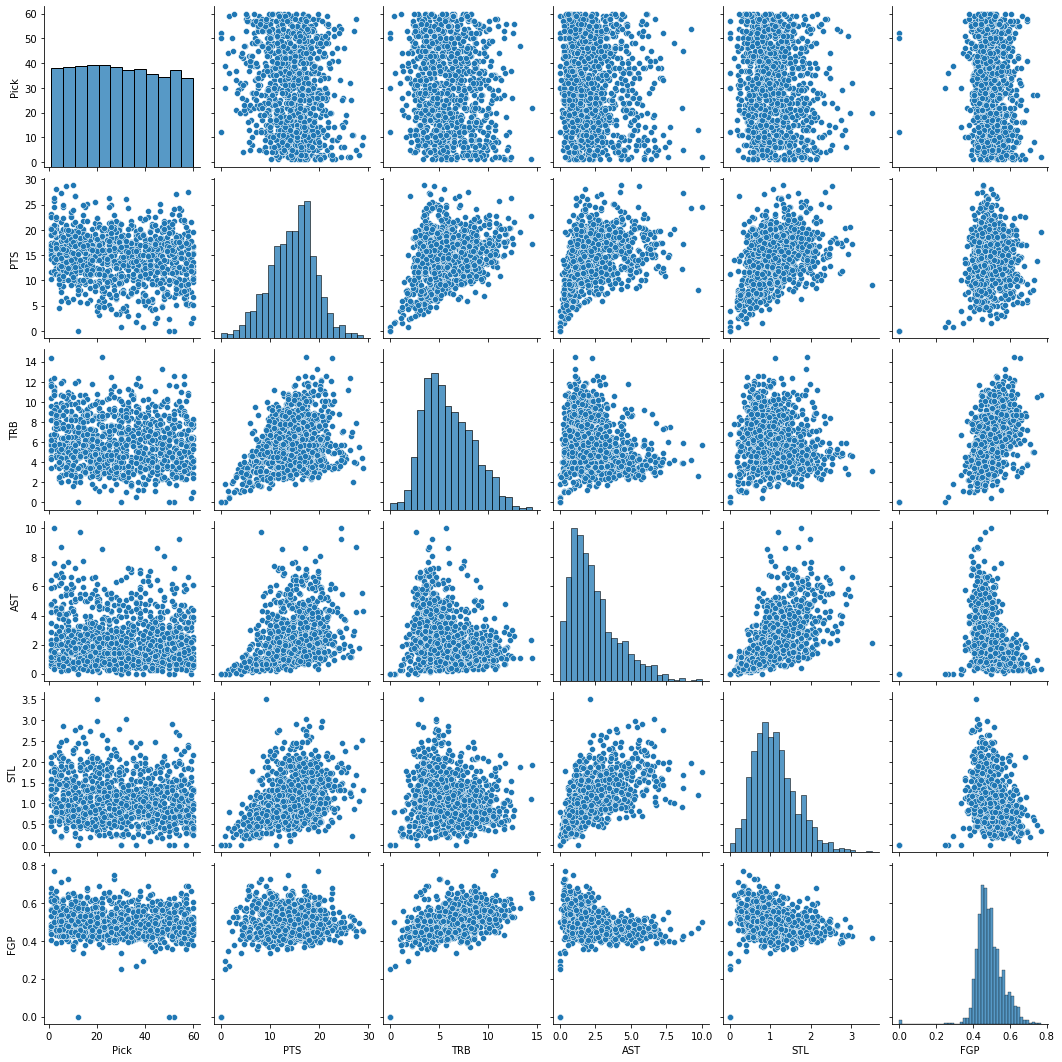

In [16]:
# Here we checked some of the most important stats, and the connection between them.
sns.pairplot(new_df[["Pick","PTS","TRB","AST", "STL","FGP"]])